In [2]:
# Import libraries

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
X_train= pd.read_csv('/Users/cuicuisong/Desktop/data/X_train_aggregated.csv',  index_col=0)
X_test= pd.read_csv('/Users/cuicuisong/Desktop/data/X_test_aggregated.csv',  index_col=0)
y_train= pd.read_csv('/Users/cuicuisong/Desktop/data/y_train_agg.csv')
y_test= pd.read_csv('/Users/cuicuisong/Desktop/data//y_test_agg.csv')

In [4]:
X_train.head()

,DeductibleAmtPaid_mean,DeductibleAmtPaid_max,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,OPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_max,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_mean,OPAnnualDeductibleAmt_max,OPAnnualDeductibleAmt_sum,...,Chronic_KidneyDisease_Frac,Chronic_Cancer_Frac,Chronic_ObstrPulmonary_Frac,Chronic_Depression_Frac,Chronic_Diabetes_Frac,Chronic_IschemicHeart_Frac,Chronic_Osteoporasis_Frac,Chronic_rheumatoidarthritis_Frac,Chronic_stroke_Frac,Deceased_Frac
Provider,,,,,,,,,,,,,,,,,,,,,
PRV53960,2.452381,200.0,12.000000,12.000000,3279.214286,43330,1377270,902.166667,9180,378910,...,0.480952,0.085714,0.242857,0.426190,0.719048,0.773810,0.357143,0.316667,0.040476,0.016667
PRV52517,3.750000,70.0,11.625000,12.000000,2082.500000,6110,66640,537.500000,1530,17200,...,0.375000,0.187500,0.281250,0.343750,0.593750,0.781250,0.218750,0.625000,0.062500,0.000000
PRV55652,1.785714,50.0,12.000000,12.000000,1757.500000,9840,49210,500.357143,3110,14010,...,0.178571,0.107143,0.285714,0.535714,0.714286,0.785714,0.392857,0.321429,0.071429,0.000000
PRV57328,4.473684,70.0,12.000000,12.000000,1498.157895,7400,56930,465.789474,1550,17700,...,0.342105,0.105263,0.236842,0.394737,0.500000,0.631579,0.342105,0.263158,0.078947,0.052632
PRV56721,4.059406,100.0,11.915842,11.881188,2032.673267,24260,410600,599.900990,6300,121180,...,0.430693,0.158416,0.356436,0.485149,0.643564,0.722772,0.321782,0.232673,0.084158,0.000000


In [5]:
y_train.head()

,PotentialFraud
0,0
1,0
2,0
3,0
4,0


In [9]:
X_train.shape

(4328, 54)

In [10]:
y_train.shape

(4328, 1)

In [73]:
y_test.shape

(1082, 1)

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4328 entries, PRV53960 to PRV52602
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DeductibleAmtPaid_mean            4328 non-null   float64
 1   DeductibleAmtPaid_max             4328 non-null   float64
 2   NoOfMonths_PartACov_mean          4328 non-null   float64
 3   NoOfMonths_PartBCov_mean          4328 non-null   float64
 4   OPAnnualReimbursementAmt_mean     4328 non-null   float64
 5   OPAnnualReimbursementAmt_max      4328 non-null   int64  
 6   OPAnnualReimbursementAmt_sum      4328 non-null   int64  
 7   OPAnnualDeductibleAmt_mean        4328 non-null   float64
 8   OPAnnualDeductibleAmt_max         4328 non-null   int64  
 9   OPAnnualDeductibleAmt_sum         4328 non-null   int64  
 10  ClaimCounts                       4328 non-null   int64  
 11  Gender                            4328 non-null   float64
 12  

In [12]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1082 entries, PRV53763 to PRV53544
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DeductibleAmtPaid_mean            1081 non-null   float64
 1   DeductibleAmtPaid_max             1081 non-null   float64
 2   NoOfMonths_PartACov_mean          1082 non-null   float64
 3   NoOfMonths_PartBCov_mean          1082 non-null   float64
 4   OPAnnualReimbursementAmt_mean     1082 non-null   float64
 5   OPAnnualReimbursementAmt_max      1082 non-null   int64  
 6   OPAnnualReimbursementAmt_sum      1082 non-null   int64  
 7   OPAnnualDeductibleAmt_mean        1082 non-null   float64
 8   OPAnnualDeductibleAmt_max         1082 non-null   int64  
 9   OPAnnualDeductibleAmt_sum         1082 non-null   int64  
 10  ClaimCounts                       1082 non-null   int64  
 11  Gender                            1082 non-null   float64
 12  

In [7]:
# Train and test data
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Notes: 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 99)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

In [8]:
# use MinMaxScaler and LogisticRegression to build a classification pipeline.
steps = [# ('rescale', MinMaxScaler()),
         ('logr', LogisticRegression())]
model = Pipeline(steps)
model = model.fit(X_train, y_train)

In [13]:
# predacting
# Use the predict function of the model to make predictions for the training set and test set,
# and assign the outputs to y_train_pred and y_test_pred, respectively.

y_train_pred = model.predict(X_train)


In [15]:
# fill NA as 0, X_test has null values
X_test.fillna(0,inplace=True)
y_test_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#### Calculate the training and testing accuracy scores.

In [18]:
print('Training Accuracy Score: {0:.3f}'.format(accuracy_score(y_train, y_train_pred)))
print('Testinging Accuracy Score: {0:.3f}'.format(accuracy_score(y_test, y_test_pred)))

Training Accuracy Score: 0.939
Testinging Accuracy Score: 0.938


#### Calculate the precision, recall, and f1 scores. You can use classification report.

In [19]:
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3925
           1       0.74      0.52      0.61       403

    accuracy                           0.94      4328
   macro avg       0.85      0.75      0.79      4328
weighted avg       0.93      0.94      0.93      4328

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       979
           1       0.75      0.52      0.62       103

    accuracy                           0.94      1082
   macro avg       0.85      0.75      0.79      1082
weighted avg       0.93      0.94      0.93      1082



#### Get the confusion matrix

In [20]:
print(confusion_matrix(y_train, y_train_pred))
print("-------------")
print(confusion_matrix(y_test, y_test_pred))

[[3852   73]
 [ 193  210]]
-------------
[[961  18]
 [ 49  54]]


### Feature Importance

Feature: 0, Score: -0.02669
Feature: 1, Score: -0.05665
Feature: 2, Score: 0.01445
Feature: 3, Score: -0.11017
Feature: 4, Score: 0.05524
Feature: 5, Score: -0.02704
Feature: 6, Score: -0.03860
Feature: 7, Score: -0.02802
Feature: 8, Score: -0.06474
Feature: 9, Score: 0.01065
Feature: 10, Score: -0.06389
Feature: 11, Score: -0.01373
Feature: 12, Score: -0.11990
Feature: 13, Score: -0.00184
Feature: 14, Score: -0.11663
Feature: 15, Score: 0.01227
Feature: 16, Score: 0.12011
Feature: 17, Score: -0.02852
Feature: 18, Score: 0.34203
Feature: 19, Score: -0.22861
Feature: 20, Score: -0.08473
Feature: 21, Score: 2.56137
Feature: 22, Score: 1.53903
Feature: 23, Score: 0.07502
Feature: 24, Score: -0.03451
Feature: 25, Score: 0.11648
Feature: 26, Score: -0.03344
Feature: 27, Score: -0.00828
Feature: 28, Score: -0.08341
Feature: 29, Score: 0.08564
Feature: 30, Score: -0.08871
Feature: 31, Score: 0.08633
Feature: 32, Score: -0.00857
Feature: 33, Score: 0.03609
Feature: 34, Score: -0.00841
Feature:

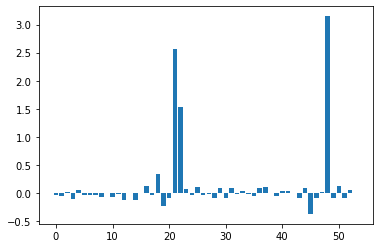

In [74]:
# Note: https://pythonguides.com/scikit-learn-logistic-regression/

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

X_train, y_train = make_classification(n_samples=5410, n_features=54,  random_state=1)

model_feature = LogisticRegression()

model_feature = model_feature.fit(X_train, y_train)
importance = model_feature.coef_[0]

for i,j in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,j))

pyplot.bar([X for X in range(len(importance))], importance)
pyplot.show()



Feature: 0, Score: 0.00474
Feature: 1, Score: 0.06157
Feature: 2, Score: -0.00190
Feature: 3, Score: -0.01951
Feature: 4, Score: 0.04215
Feature: 5, Score: 0.04054
Feature: 6, Score: -0.01630
Feature: 7, Score: -0.03327
Feature: 8, Score: -0.01874
Feature: 9, Score: -0.27470
Feature: 10, Score: 0.00661
Feature: 11, Score: 0.02754
Feature: 12, Score: 0.03576
Feature: 13, Score: -0.03797
Feature: 14, Score: -0.06009
Feature: 15, Score: 0.04281
Feature: 16, Score: -0.00375
Feature: 17, Score: -0.00043
Feature: 18, Score: 0.00513
Feature: 19, Score: 0.03315
Feature: 20, Score: -0.04054
Feature: 21, Score: 0.01299
Feature: 22, Score: 0.05824
Feature: 23, Score: -0.00438
Feature: 24, Score: -0.03922
Feature: 25, Score: -0.25678
Feature: 26, Score: 0.03513
Feature: 27, Score: 0.02228
Feature: 28, Score: -0.01584
Feature: 29, Score: -0.04460
Feature: 30, Score: -0.05858
Feature: 31, Score: 0.00389
Feature: 32, Score: 0.08475
Feature: 33, Score: -0.02623
Feature: 34, Score: -0.17915
Feature: 35

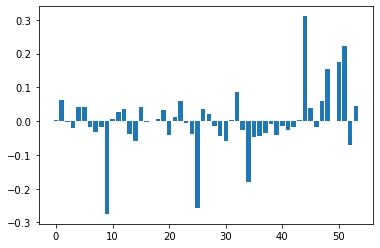

In [80]:
# ADD n_informative=5, n_redundant=5,

X_train1, y_train1 = make_classification(n_samples=5410, n_features=54, n_informative=5, n_redundant=5, random_state=1)

model_feature1 = LogisticRegression()

model_feature1= model_feature1.fit(X_train1, y_train1)
importance = model_feature1.coef_[0]

for i,j in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,j))


pyplot.bar([X for X in range(len(importance))], importance)
pyplot.show()


# Feature: 1, Score: -0.05591
# Feature: 3, Score: 0.13607
# Feature: 5, Score: -0.28413
# Feature: 7, Score: 0.39096
        

In [61]:
# import math

In [64]:
# feature_names = list(X_train.columns)
"""feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show() """

'feature_importance = pd.DataFrame(feature_names, columns = ["feature"])\nfeature_importance["importance"] = pow(math.e, w)\nfeature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)\n \nfrom sklearn.linear_model import LogisticRegression\nax = feature_importance.plot.barh(x=\'feature\', y=\'importance\')\nplt.show() '

### II. Prediction with balanced class weights: may not need this part, because our data is balanced?

##### 2.1 Set class_weight in Logistic Regression and retrain the model.

In [29]:
steps = [#('rescale', MinMaxScaler()),
         ('logr', LogisticRegression(class_weight = 'balanced'))]
model_balanced = Pipeline(steps)
model_balanced = model.fit(X_train, y_train)

In [31]:
y_train_pred_balanced = model_balanced.predict(X_train)
y_test_pred_balanced = model_balanced.predict(X_test)

##### Re-calcualte all the above metrics and confusion matrix.

In [32]:
# training/testing Accuracy scores
print('Training Accuracy Score: {0:.3f}'.format(accuracy_score(y_train, y_train_pred_balanced)))
print('Testinging Accuracy Score: {0:.3f}'.format(accuracy_score(y_test, y_test_pred_balanced)))

# notes: same as non-balanced model, because our data are balanced?

Training Accuracy Score: 0.939
Testinging Accuracy Score: 0.938


In [33]:
print(classification_report(y_train, y_train_pred_balanced))
print(classification_report(y_test, y_test_pred_balanced))

# notes: same as non-balanced model

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3925
           1       0.74      0.52      0.61       403

    accuracy                           0.94      4328
   macro avg       0.85      0.75      0.79      4328
weighted avg       0.93      0.94      0.93      4328

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       979
           1       0.75      0.52      0.62       103

    accuracy                           0.94      1082
   macro avg       0.85      0.75      0.79      1082
weighted avg       0.93      0.94      0.93      1082



In [34]:
print(confusion_matrix(y_train, y_train_pred_balanced))
print("-------------")
print(confusion_matrix(y_test, y_test_pred_balanced))

[[3852   73]
 [ 193  210]]
-------------
[[961  18]
 [ 49  54]]


### III. Use the predict_proba function of the model to make predictions for the training and testing sets

In [ ]:
steps = [#('rescale', MinMaxScaler()),
         ('logr', LogisticRegression(class_weight = 'balanced'))]
model_balanced = Pipeline(steps)
model_balanced = model.fit(X_train, y_train)
y_train_pred_balanced = model_balanced.predict(X_train)
y_test_pred_balanced = model_balanced.predict(X_test)

In [37]:
y_train_proba = model_balanced.predict_proba(X_train)
y_test_proba = model_balanced.predict_proba(X_test)

In [41]:
y_train_proba.shape

(4328, 2)

In [42]:
y_test_proba.shape

(1082, 2)

In [44]:
y_test_proba

# The output from predict is the values of 0 or 1 while the output of predict_prob has two columns: the first column is the probability of predicting 0, the second column is the probability of predicting 1.
# In this case, we should care about the second column, probability of 1.

array([[0.39504299, 0.60495701],
       [0.98357082, 0.01642918],
       [0.97210135, 0.02789865],
       ...,
       [0.97663677, 0.02336323],
       [0.98827317, 0.01172683],
       [0.9957318 , 0.0042682 ]])

In [45]:
# What is the range of the values in y_train_proba and y_test_proba? What do the values mean?
print('The range of y_train_proba is: (', np.min(y_train_proba[:,1]), ',', np.max(y_train_proba[:,1]), ')')
print('The range of y_train_proba is: (', np.min(y_test_proba[:,1]), ',', np.max(y_test_proba[:,1]), ')')

The range of y_train_proba is: ( 0.0005780947911384222 , 0.9999978560184316 )
The range of y_train_proba is: ( 0.0006929044900078012 , 0.9992108107469493 )


#### 3.2 Threshold

In [ ]:
# Change the threshold value applied in the transformation from y_test_proba to y_test_pred, 
# and visualize how the threshold value changes precision, recall, and f1 score.

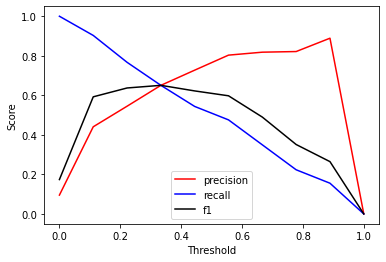

In [46]:
# Plot metrics scores v.s. threshold - Linda

thresholds = np.linspace(0, 1, 10)
precisions = []
recalls = []
f1s = []
ave = "binary"

for cut in thresholds:
    y_test_pred_new = (y_test_proba[:, 1] > cut).astype(int)
    precisions.append(precision_score(y_test, y_test_pred_new, average=ave))
    recalls.append(recall_score(y_test, y_test_pred_new, average=ave))
    f1s.append(f1_score(y_test, y_test_pred_new, average=ave))

plt.plot(thresholds, precisions, color="red", label="precision")
plt.plot(thresholds, recalls, color="blue", label="recall")
plt.plot(thresholds, f1s, color="black", label="f1")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc="best")

Text(0.5, 1.0, 'Precision, Recall, and f1 Score versus Threshold')

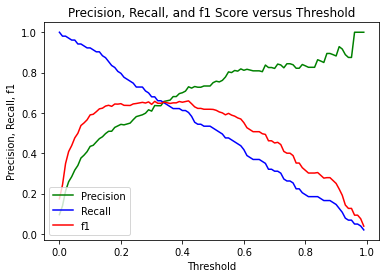

In [47]:
# Cuicui
thresholds = np.arange(0, 1.0, 0.01)
precision_lst=[]
recall_lst=[]
f1_lst = []
for i in thresholds:
    y_test_prednew1= (y_test_proba[:, 1]>= i).astype(int)
    precision_lst.append(precision_score(y_test, y_test_prednew1))
    recall_lst.append(recall_score(y_test, y_test_prednew1))
    f1_lst.append(f1_score(y_test, y_test_prednew1))
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision_lst, "g-", label="Precision")
plt.plot(thresholds, recall_lst, "b-", label="Recall")
plt.plot(thresholds, f1_lst, "r-", label="f1")
plt.ylabel("Precision, Recall, f1")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.title('Precision, Recall, and f1 Score versus Threshold')

#### 3.3 ROC AUC

##### Calculate the train and test roc_auc_scores.

In [48]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_train_proba[:, 1])

0.9482922665992318

In [49]:
roc_auc_score(y_test, y_test_proba[:, 1])

0.9462895564128248

#### Plot the ROC curve of test scores, use the roc_curve module in sklearn to obtain relevant data.

In [50]:
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_proba[:, 1])

Text(0, 0.5, 'true positive rate')

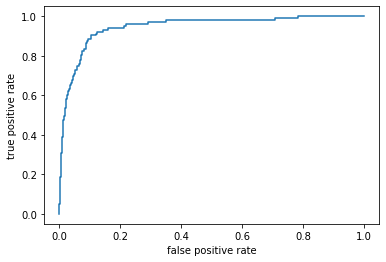

In [53]:
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
# The x axes is the false positive rate (recall or sensitivity) and the y axes is the true positive rate.

#### 3.4 Log Loss

##### Calculate the train and test log loss.

In [54]:
from sklearn.metrics import log_loss
log_loss(y_train, y_train_proba)

0.15151099448878477

In [55]:
log_loss(y_test, y_test_proba)

0.1561183374796667